## 除了爬取已有的頁面資訊之外，爬蟲也可以模擬表單傳送，然後取得結果。

## 這裡用自來水公司水費查詢頁面為例

## 我們可以利用瀏覽器的開發者模式來了解表單傳送了什麼資訊，然後模擬傳送這些資訊

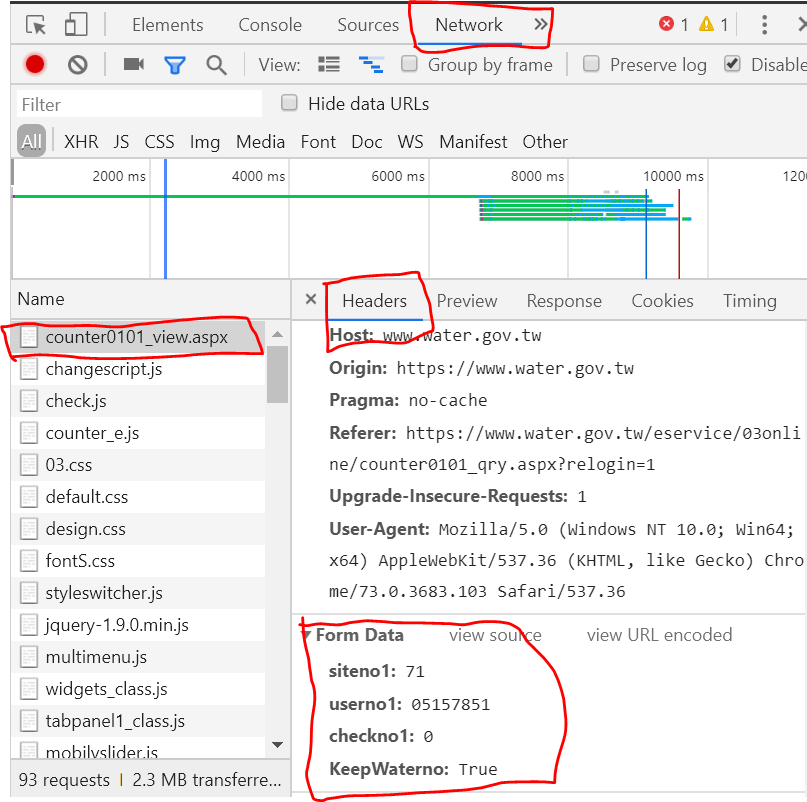

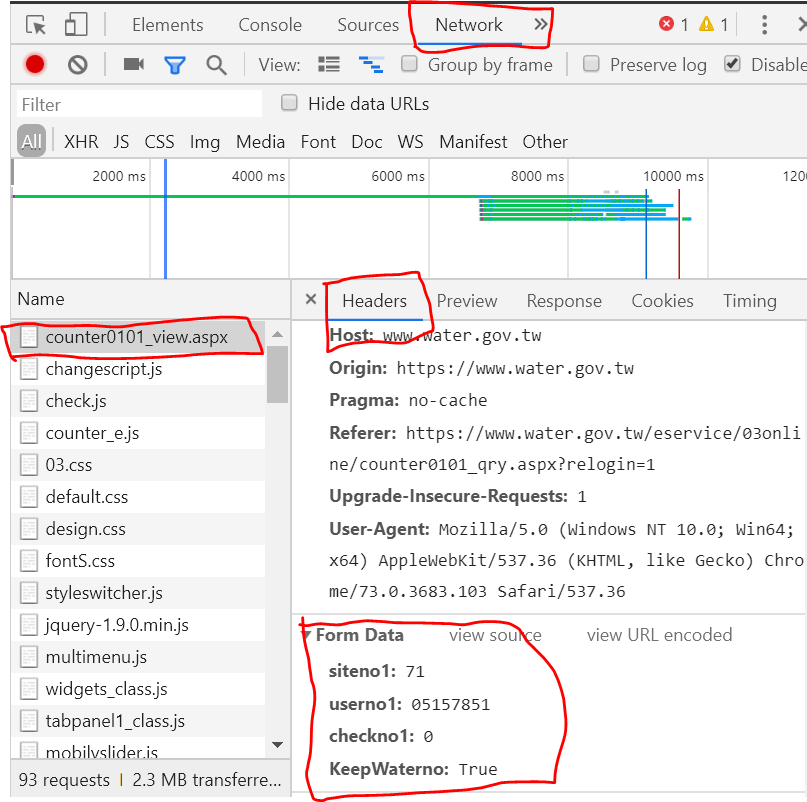

## 從以上資訊我們可以知道 真正接受資料的是 https://www.water.gov.tw/eservice/03online/counter0101_view.aspx


利用 formdata 這個字典傳送表單內容

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


水號 = '71051578510'

url = 'https://www.water.gov.tw/eservice/03online/counter0101_view.aspx'

formdata = {'siteno1':水號[0:2],
'userno1':水號[2:10],
'checkno1':水號[-1],
'KeepWaterno':'True'}
resp = requests.post(url, data=formdata)

resp.text


'\r\n\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n\r\n<html xml:lang="zh-TW" lang="zh-TW" xmlns:hyweb="urn:gip-hyweb-com" xmlns="http://www.w3.org/1999/xhtml">\r\n\r\n<head><title>\r\n\t網站e櫃台\r\n</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n    \r\n    <script language="JavaScript" type="text/javascript" charset="utf-8" src="../js/changescript.js"></script>\r\n    <script language="JavaScript" type="text/javascript" charset="utf-8" src="../js/check.js"></script>\r\n    \r\n    <meta http-equiv="Content-Type" content="text/html; charset=big5" />\r\n\t<script language="JavaScript" type="text/javascript" charset="big5" src="../js/counter_e.js"></script>\r\n\t\r\n    <title>網站e櫃台</title>\r\n    <link href="../css/03.css" rel="stylesheet" type="text/css">\r\n    <style type="text/css">\r\n        <!--\r\n        #Layer6 {\r\n            position: absolute;\r\n          

# 我們成功的取得結果的頁面，但很可惜，頁面是表格，很複雜。

## 接下來我們用一個超厲害的套件 pandas，可以直接把 HTML 裡的 table 讀出來。

In [4]:
import pandas as pd

tables = pd.read_html(resp.text)

print(len(tables))

tables

5


[                                                  0    \
 0   1080215  水情嚴峻  function showMem() {  document....   
 1   水費查詢  一、下列所顯示貴戶之近期原始計費資料，期間倘有變動，以實際應繳金額為準。  二、...   
 2                                                 NaN   
 3                                                 NaN   
 4                                                 NaN   
 5                                                 NaN   
 6                                                 NaN   
 7                                                 NaN   
 8                                                 NaN   
 9                                                 NaN   
 10                                                NaN   
 11                                                NaN   
 12                                    水 號：71051578510   
 13                           用水地址：*雄*苓*區*平*路*４*巷*７*２*   
 14  繳費年月用水度數(不含分攤度數)合計度數(含分攤度數)應繳金額實繳金額銷帳日期繳費狀況代收日...   
 15                                               繳費年月   
 16           

# 這個頁面一共被解析出 5 個表格。只取我們要的。

In [3]:
tables[4]

,0,1,2,3,4,5,6,7,8,9,10,11
0,繳費年月,用水度數(不含分攤度數),合計度數(含分攤度數),應繳金額,實繳金額,銷帳日期,繳費狀況,代收日期,與去年比較增減度數,省水比例(含分攤度數),省水比例(不含分攤度數),查看
1,108/03,80度,80度,1591元,1591元,108/ 3/13,已繳,NaN,51度,-175.86%,-175.86%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
2,108/01,55度,55度,1073元,1073元,108/ 1/11,已繳,NaN,11度,-25.00%,-25.00%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
3,107/11,36度,37度,685元,685元,107/11/13,已繳,NaN,-3度,5.13%,7.69%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
4,107/09,21度,21度,374元,374元,107/ 9/13,已繳,NaN,-20度,50.00%,48.78%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
5,107/07,26度,26度,492元,492元,107/ 7/12,已繳,NaN,-26度,50.00%,50.00%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
6,107/05,15度,15度,266元,266元,107/ 5/11,已繳,NaN,-32度,68.09%,68.09%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
7,107/03,29度,29度,490元,490元,107/ 3/13,已繳,NaN,NaN,%,%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
8,107/01,44度,44度,863元,863元,107/ 1/11,已繳,NaN,NaN,%,%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
9,106/11,39度,39度,769元,769元,106/11/13,已繳,NaN,NaN,%,%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"


# 自來水表查詢程式: [實作2. 來查水錶了!.ipynb](實作2. 來查水錶了!.ipynb)